
# Decomposition Algorithm with Python/Gurobi
## [Jon Lee](https://sites.google.com/site/jonleewebpage/home), 11/2/2020

Apply the (Dantzig-Wolfe) Decomposition Algorithm to:

\begin{align*}\tag{Q}
z := \min~& c'x\\
&Ex \geq h~;\\
&Ax   = b~;\\
&x \geq \mathbf{0}~,
\end{align*}
treating $Ex \geq h$ as the "complicating constraints''.

Notes:

* In this implementaion, we never delete generated columns 

References:

* Jon Lee, "A First Course in Linear Optimization", Fourth Edition (Version 4.05), Reex Press, 2013-22.

MIT License

Copyright (c) 2020 Jon Lee

Permission is hereby granted, free of charge, to any person obtaining a copy 
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [1]:
%reset -f
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

class StopExecution(Exception):
    def _render_traceback_(self):
        pass

In [2]:
MAXIT = 500
# generate a random example
n = 100   # number of variables
m1 = 200  # number of equations to relax
m2 = 50  # number of equations to keep
np.random.seed(25)   # change the seed for a differemt example 
E=0.01*np.random.randint(-5,high=5,size=(m1,n)).astype(float) #np.random.randn(m1,nt)
A=0.01*np.random.randint(-2,high=3,size=(m2,n)).astype(float) #np.random.randn(m2,nt)

# choose the right-hand sides so that Q will be feasible
xfeas=0.1*np.random.randint(0,high=5,size=n).astype(float)
h=E.dot(xfeas) - 0.1*np.random.randint(0,high=10,size=m1).astype(float)      
b=A.dot(xfeas)

# choose the objective function so that the dual of Q will be feasible
yfeas=0.1*np.random.randint(0,high=5,size=m1).astype(float)
pifeas=0.1*np.random.randint(-5,high=5,size=m2).astype(float)
c=np.transpose(E)@yfeas + np.transpose(A)@pifeas +  0.1*np.random.randint(0,high=1,size=n).astype(float)   

*****  Solve as one big LP --- for comparison purposes
Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-16
Discarded solution information
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 250 rows, 100 columns and 21957 nonzeros
Model fingerprint: 0xd5eae979
Coefficient statistics:
  Matrix range     [1e-02, 5e-02]
  Objective range  [2e-02, 5e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-18, 1e+00]
Presolve time: 0.01s
Presolved: 250 rows, 100 columns, 21957 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.2122000e+31   1.799360e+33   4.212200e+01      0s
     211   -5.6119344e+00   0.000000e+00   0.000000e+00      0s

Solved in 211 iterations and 0.03 seconds (0.03 work units)
Optimal objective -5.611934358e+00
 
*****  Proceed to Decomposition
***** Phase I needed
 
***** Currently in Phas

***** Gurobi Subproblem solve status: 5
***** reduced cost= -1.4979886322735556
 
***** Currently in Phase 1 . Iteration number 47
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.04227044666391677
 
***** Currently in Phase 1 . Iteration number 48
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.021448626867330844
 
***** Currently in Phase 1 . Iteration number 49
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= 0.1000031093792309
***** reduced cost= -0.24792033699117982
 
***** Currently in Phase 1 . Iteration number 50
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.025401944499725437
 
***** Currently in Phase 1 . Iteration number 51
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subp

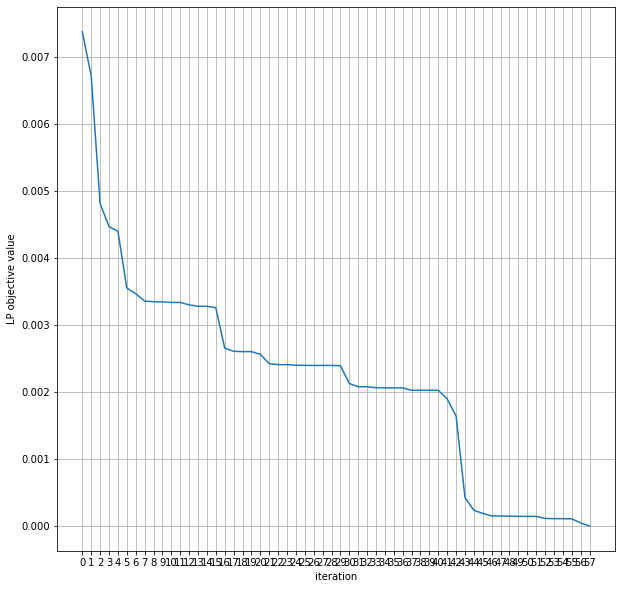

 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= 17.027585991218984
***** reduced cost= -51.236006742985374
 
***** Currently in Phase 2 . Iteration number 59
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= 7.392292550113887
***** reduced cost= -23.918602349909094
 
***** Currently in Phase 2 . Iteration number 60
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -61.54336790864815
 
***** Currently in Phase 2 . Iteration number 61
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -34.56610824580545
 
***** Currently in Phase 2 . Iteration number 62
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -64.31477175436248
 
***** Currently in Phase 2 . Iteration number 63
***** Solving Main L

***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= 2.5580044915753453
***** reduced cost= -11.230112941659677
 
***** Currently in Phase 2 . Iteration number 119
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -19.114463189115867
 
***** Currently in Phase 2 . Iteration number 120
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -1.3061181772886243
 
***** Currently in Phase 2 . Iteration number 121
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.2662552837382606
 
***** Currently in Phase 2 . Iteration number 122
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= 4.196220586917605
***** reduced cost= -14.675429381220965
 
***** Currently in Phase 2 . Iteration number 123
***** Solving 

***** Gurobi Subproblem solve status: 2
***** sigma= 3.865319313191311
***** reduced cost= -10.659667546687455
 
***** Currently in Phase 2 . Iteration number 172
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.8519795105185164
 
***** Currently in Phase 2 . Iteration number 173
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.8173279534126578
 
***** Currently in Phase 2 . Iteration number 174
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.9831424868705056
 
***** Currently in Phase 2 . Iteration number 175
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -26.969971236743277
 
***** Currently in Phase 2 . Iteration number 176
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subpro

 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.005082392488983345
 
***** Currently in Phase 2 . Iteration number 213
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.00034775161643185726
 
***** Currently in Phase 2 . Iteration number 214
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= -0.6318759147176682
***** reduced cost= -4.03245418019725
 
***** Currently in Phase 2 . Iteration number 215
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.5356750435906577
 
***** Currently in Phase 2 . Iteration number 216
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.18492463969764117
 
***** Currently in Phase 2 . Iteration number 217
***** Solving Main LP...
 
***** Solv

 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -2.289516464556236
 
***** Currently in Phase 2 . Iteration number 256
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -2.395934782995937
 
***** Currently in Phase 2 . Iteration number 257
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.7399199166740118
 
***** Currently in Phase 2 . Iteration number 258
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -2.4493136801577364
 
***** Currently in Phase 2 . Iteration number 259
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -3.0777969751214584
 
***** Currently in Phase 2 . Iteration number 260
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subpro

***** Gurobi Subproblem solve status: 2
***** sigma= -0.5483176097854283
***** reduced cost= -2.031480402889136
 
***** Currently in Phase 2 . Iteration number 309
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= -0.7633321047601492
***** reduced cost= -2.750129430455529
 
***** Currently in Phase 2 . Iteration number 310
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= -0.4861966476219711
***** reduced cost= -1.997760781927021
 
***** Currently in Phase 2 . Iteration number 311
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= -0.5575066065987768
***** reduced cost= -1.6166785373943997
 
***** Currently in Phase 2 . Iteration number 312
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= -0.11045109950675581
***** reduced cost= -2.06473115280124

 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= -0.9201200749494167
***** reduced cost= -0.8293758707126249
 
***** Currently in Phase 2 . Iteration number 363
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= -1.0565752177195735
***** reduced cost= -0.7133487575176858
 
***** Currently in Phase 2 . Iteration number 364
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= -0.9809976891577535
***** reduced cost= -0.5385918195096177
 
***** Currently in Phase 2 . Iteration number 365
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.007318948053215424
 
***** Currently in Phase 2 . Iteration number 366
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 5
***** reduced cost= -0.0007958989299363672
 
***** Currently in Ph

 
***** Currently in Phase 2 . Iteration number 411
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= -0.9053197876005792
***** reduced cost= -0.11313922117983344
 
***** Currently in Phase 2 . Iteration number 412
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= -0.9124930740405048
***** reduced cost= -0.07771924764704241
 
***** Currently in Phase 2 . Iteration number 413
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= -0.9625373550652438
***** reduced cost= -0.07538489946136351
 
***** Currently in Phase 2 . Iteration number 414
***** Solving Main LP...
 
***** Solving Subproblem LP...
***** Gurobi Subproblem solve status: 2
***** sigma= -1.1343847697815228
***** reduced cost= -0.1489137525184474
 
***** Currently in Phase 2 . Iteration number 415
***** Solving Main LP...
 
***** Solving Subproblem L

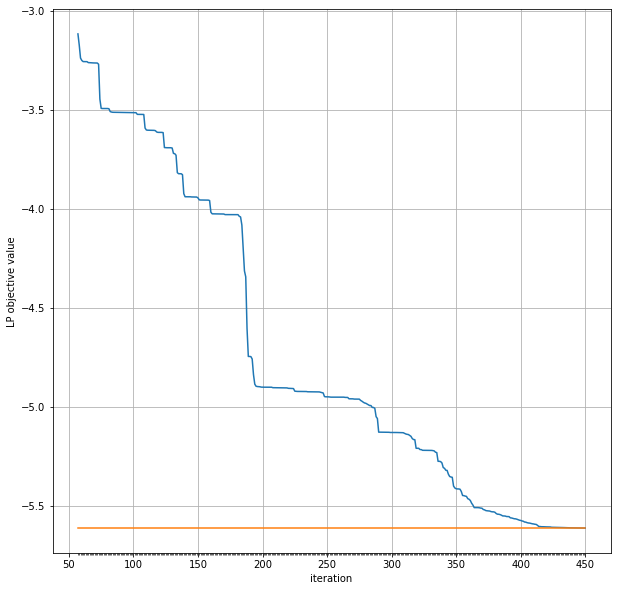

 
***** Number of basic-feasible solutions generated: 245
 
***** Number of basic-feasible rays generated: 206


In [3]:
print("*****  Solve as one big LP --- for comparison purposes")
modelQ = gp.Model()
modelQ.reset()
xQ = modelQ.addMVar(n)  
objective = modelQ.setObjective(c@xQ, GRB.MINIMIZE)
constraintsQ1 = modelQ.addConstr(E@xQ >= h)
constraintsQ2 = modelQ.addConstr(A@xQ == b)
modelQ.optimize()
if modelQ.status != GRB.Status.OPTIMAL:
    print("***** Gurobi solve status:", modelQ.status)
    print("***** This is a problem. Stopping execution.")
    raise StopExecution
print(" ")
print("*****  Proceed to Decomposition")

# initialization for Decomposition
results1=[]
results2=[]
ITER=0
xgen=0
zgen=0
y=np.zeros(m1) 

# set up the Subproblem model and get one basic feasible solution
modelS = gp.Model()
modelS.setParam('OutputFlag', 0)   # quiet the Gurobi output 
x = modelS.addMVar(n)  
constraintsS = modelS.addConstr(A@x == b)  
#modelS.setObjective(c@x, GRB.MINIMIZE)
modelS.optimize()
if modelS.status != GRB.Status.OPTIMAL:
    print("***** Gurobi (initial) Subproblem solve status:", modelS.status)
    print("***** This is a problem. Stopping execution.")
    raise StopExecution
xgen += 1

# construct a basis
XZ=np.reshape(x.X,(n,1))
#Z=np.r_[np.zeros((n-m1,m1)),np.eye(m1)]
#Z=np.empty((n,0), dtype=float)
h1=np.r_[h,(1)]
#B=np.c_[np.r_[np.eye(m1),np.zeros((1,m1))],np.r_[E@x.X,(1)]]
B=np.c_[-np.r_[np.eye(m1),np.zeros((1,m1))],np.r_[E@x.X,(1)]]


# set up the Main Phase-2 model
modelM2 = gp.Model()
s = modelM2.addMVar(m1+1)
modelM2.setObjective(c@x.X*s[m1], GRB.MINIMIZE)
modelM2.addConstrs((-s[i] + E[i,:]@x.X*s[m1] ==  h[i] for i in range(m1)))
modelM2.addConstr(s[m1]==1)
modelM2.update()
constraintsM2=modelM2.getConstrs()

# Identify if the constructed basis is feasible to see if Phase 1 is needed
if min(np.linalg.solve(B, h1)) >= -1e-10:
    print('***** Phase I not needed')
    Phase=2
    modelM=modelM2
else:
    print('***** Phase I needed')
    Phase=1
    ITERphaseI=1
    modelM1=modelM2.copy()
    modelM1.setParam('OutputFlag', 0)   # quiet the Gurobi output 
    constraintsM1=modelM1.getConstrs()
    # create the artificial variable
    newcol=gp.Column(-np.r_[E@x.X-np.ones(m1),(1)],constraintsM1)
    modelM1.setObjective(0.0, GRB.MINIMIZE)
    modelM1.addVar(obj=1.0, column=newcol, name='artificial')
    modelM=modelM1
    modelM.setParam('OutputFlag', 0)   # quiet the Gurobi output 

while True:
    ITER += 1
    print(" ")
    print("***** Currently in Phase", Phase, ". Iteration number", ITER)    
    print("***** Solving Main LP...")
    modelM.optimize()
    if modelM.status != GRB.Status.OPTIMAL:
        print("***** Gurobi Main solve status:", modelM.status)
        print("***** This is a problem. Stopping execution.")
        raise StopExecution
    results1=np.append(results1,ITER-1)
    results2=np.append(results2,modelM.Objval)
    if Phase==1 and modelM.Objval < 0.0000001:
        print("***** Phase I succeeded")
        print("LP iter", "    LP val")
        print("---------  ---------")
        for j in range(ITER):
            print(np.int(results1[j]), "         ", np.round(results2[j],9))
        fig, ax = plt.subplots(figsize=(10,10))
        ax.plot(results1[0:ITER], results2[0:ITER])
        ax.set(xlabel='iteration', ylabel='LP objective value')
        ax.set_xticks(ticks=results1, minor=False)
        ax.grid()
        plt.show()
        ITERphaseI=ITER
        Phase=2
        # switch to the Phase II model
        modelM=modelM2
        modelM.setParam('OutputFlag', 0)   # quiet the Gurobi output 
        modelM.optimize()
        # overwrite last iteration result with phase-II objective value
        results2[ITER-1]=modelM.Objval
    if ITER == MAXIT: break 
            
    constraintsM=modelM.getConstrs()
    for i in range(m1):
        y[i]=constraintsM[i].Pi
    sigma=constraintsM[m1].Pi
    if Phase==1: modelS.setObjective((-y.dot(E))@x, GRB.MINIMIZE)
    else: modelS.setObjective((c-y.dot(E))@x, GRB.MINIMIZE)
    print(" ")
    print("***** Solving Subproblem LP...")
    modelS.optimize()
    if modelS.status != GRB.Status.OPTIMAL and modelS.status != GRB.Status.UNBOUNDED:
        print("***** Gurobi Subproblem solve status:", modelS.status)
        print("***** This is a problem. Stopping execution.")
        raise StopExecution
    if modelS.status == GRB.Status.OPTIMAL:
        print("***** Gurobi Subproblem solve status:", modelS.status)
        reducedcost = -sigma + modelS.Objval
        print("***** sigma=",sigma)
        print("***** reduced cost=",reducedcost)
        if reducedcost < -0.0001:
            xnew=x.X
            if Phase==1:
                newcol=gp.Column(np.r_[E@xnew,(1)],constraintsM1)
                modelM1.addVar(obj=0.0, column=newcol)
            newcol=gp.Column(np.r_[E@xnew,(1)],constraintsM2)
            modelM2.addVar(obj=c@xnew, column=newcol)
            XZ=np.c_[XZ,xnew]
            xgen += 1
        else:   
            if Phase==1:
                print("***** No more improving columns for Main")
                print("***** Phase I finished without a feasible solution")
                print("***** Phase I objective", modelM.Objval)
                break
            else: # Phase 2
                print("***** No more improving columns for Main")
                print("***** Phase II finished")
                print("***** Phase II objective", modelM.Objval)
                break
    if modelS.status == GRB.Status.UNBOUNDED:
        print("***** Gurobi Subproblem solve status:", modelS.status)
        znew=x.UnbdRay
        if Phase==1:
            newcol=gp.Column(np.r_[E@znew,(0)],constraintsM1)
            modelM1.addVar(obj=0.0, column=newcol)
            reducedcost = -y.dot(E)@znew
        newcol=gp.Column(np.r_[E@znew,(0)],constraintsM2)
        modelM2.addVar(obj=c@znew, column=newcol)
        if Phase==2: 
            reducedcost = (c-y.dot(E))@znew
        print("***** reduced cost=", reducedcost)  
        #if reducedcost > 0.0001: input()
        XZ=np.c_[XZ,znew]  
        zgen += 1
        
print("LP iter", "    LP val")
print("---------  ---------")
for j in range(ITERphaseI-1,ITER):
    print(np.int(results1[j]), "         ", np.round(results2[j],9))
# recover the solution in the original variables x
greekvar=modelM2.getVars()[m1:ITER+m1]
greekval=np.zeros(ITER)
for i in range(ITER):
    greekval[i] = greekvar[i].X  
xhat=XZ@greekval 
print("***** Reality check: recover the optimal x found by decomposition.")
print("*****    Its objective value is:", np.round(c@xhat,9)) 
print(" ") 
print("***** Compare with LP value calculated without decomposition:",np.round(modelQ.Objval,9))

if ITER > ITERphaseI:
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(results1[ITERphaseI-1:ITER], results2[ITERphaseI-1:ITER])
    ax.plot(results1[ITERphaseI-1:ITER], modelQ.Objval*np.ones(ITER-ITERphaseI+1))
    ax.set(xlabel='iteration', ylabel='LP objective value')
    ax.set_xticks(ticks=results1[ITERphaseI-1:ITER], minor=True)
    ax.grid()
    plt.show()
print(" ")   
print("***** Number of basic-feasible solutions generated:", xgen)
print(" ")   
print("***** Number of basic-feasible rays generated:", zgen)